In [1]:

% matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# http://brandonrose.org/clustering
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [3]:
# import pandas as pd
# import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from textblob import TextBlob
from sklearn.preprocessing import Normalizer

In [10]:
filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'
DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')
ErrorIDX12 = pd.read_csv(filepath + 'bbcgdfd_idxNOTcleaned12.csv', index_col=0)
# ErrorIDX12

In [ ]:
recipeIDList = list(set(list(range(0,10081))).difference(ErrorIDX12.idx))
rTitle = DF.ix[recipeIDList].title.to_frame()#.reset_index()
rTitle.index = recipeIDList
rMethod =  DF.ix[recipeIDList].method.to_frame()#.reset_index()
rMethod.index = recipeIDList

In [706]:
rTitle.shape

(10051, 1)

In [782]:
ingred=[]
IngCnt = []
for id in recipeIDList:#range(0,100):
    df1 = pd.read_pickle(filepath + 'bbcgdfd_'+str(id)+'_cleaned.pkl')
    #print(df1)
#     df1[['qty1','unit1','name1']]
    tmp = [n for n in df1.name1 if pd.isnull(n)==False]
    #ingred.append(', '.join(df1.name1))
    ingred.append(' '.join(tmp))
    IngCnt.append([id, df1.shape[0]]) 

In [713]:
IngredCnt = pd.DataFrame(IngCnt, columns=['Ridx','Ningred'])
IngredCnt.index = recipeIDList
# IngredCnt

Ridx  Ningred
0          0        7
1          1       16
2          2       15
3          3        8
4          4       11
5          5       10
6          6        7
7          7       11
8          8        6
9          9       10
10        10       10
11        11        5
12        12       12
13        13        9
14        14       12
15        15       10
16        16       10
17        17        7
18        18       10
19        19        6
20        20        7
21        21       10
22        22        8
23        23        8
24        24        8
25        25       13
26        26        8
27        27        7
28        28       11
29        29        3
30        30       12
31        31        8
32        32        5
33        33        7
34        34        9
35        35       18
36        36        9
37        37       13
38        38        8
39        39        8
40        40       10
41        41        9
42        42       10
43        43        8
44        44       15
45        45       14
46        46       11
47        47        9
48        48        8
49        49        8
50        50       15
51        51       10
52        52        6
53        53        8
54        54       10
55        55        8
56        56       10
57        57       15
58        58        7
59        59       11
60        60        5
61        61       10
62        62       10
63        63        7
64        64        8
65        65        9
66        66        5
67        67       12
68        68       11
69        69        7
70        70       14
71        71        6
72        72       11
73        73       10
74        74        9
75        75        9
76        76        8
77        77        9
78        78        7
79        79        6
80        80       10
81        81       13
82        82        8
83        83       11
84        84        8
85        85        9
86        86       14
87        87        9
88        88       10
89        89        8
90        90       10
91        91        9
92        92       14
93        93       10
94        94        8
95        95        8
96        96        5
97        97       13
98        98       10
99        99       12
100      100       10
101      101       11
102      102       15
103      103        8
104      104       12
105      105        8
106      106       15
107      107        9
108      108       10
109      109       10
110      110       12
111      111        8
112      112        7
113      113       12
114      114        9
115      115       10
116      116        5
117      117       14
118      118       10
119      119       20
120      120        9
121      121        7
122      122       11
123      123       11
124      124        6
125      125       13
126      126        7
127      127        7
128      128       18
129      129       13
130      130        8
131      131        9
132      132        9
133      133        7
134      134        9
135      135       10
136      136       12
137      137        3
138      138        9
139      139        9
140      140        7
141      141        8
142      142       13
143      143       19
144      144        9
145      145        6
146      146       10
147      147       14
148      148       13
149      149        7
150      150       13
151      151       12
152      152        9
153      153        7
154      154        9
155      155        7
156      156       10
157      157       15
158      158       10
159      159        7
160      160        7
161      161        5
162      162        8
163      163        5
164      164       11
165      165        6
166      166        9
167      167       10
168      168        6
169      169        5
170      170        3
171      171        9
172      172        7
173      173        9
174      174        8
175      175       12
176      176        8
177      177        7
178      178       10
179      179        9
180      180       10
181 

In [783]:
Ing0 = pd.DataFrame(ingred, columns=['ingred'], index=recipeIDList)
Ing0.shape
Ing0

ingred
0                                                                                                                                                                                                unsalted butter sugar egg lemon self-raising flour lemons sugar
1                                                    oil onion red pepper garlic hot chilli powder paprika ground cumin beef beef stock cube tomatoes marjoram sugar tomato purée red kidney beans plain boiled long grain rice, to serve soured cream, to serve
2                                dark-chocolate butter instant coffee granules self-raising flour plain flour bicarbonate of soda light muscovado sugar caster sugar cocoa powder egg buttermilk chocolate good quality dark-chocolate carton double cream sugar
3                                                                                                                                                   unsalted butter best dark-chocolate plain flour cocoa powder white chocolate milk chocolate egg caster sugar
4                                                                                                                              light muscovado sugar sunflower oil eggs raisins orange self-raising flour bicarbonate of soda cinnamon nutmeg sugar orange juice
5                                                                                                                                                  olive oil chicken breast onion red pepper garlic chorizo Cajun seasoning grain rice plum tomato chicken stock
6                                                                                                                                                     cumin seeds chilli flakes olive oil red lentils vegetable stock milk plain yogurt and naan bread, to serve
7                                                                                                                 oil onion garlic clove potatoes carrot parsnip curry paste or powder vegetable stock lentils coriander low-fat yogurt and naan bread, to serve
8                                                                                                                                                                            olive oil boneless chicken breast cherry tomatoes pesto crème fraîche basil have it
9                                                                                                                                 self-raising flour salt baking powder butter caster sugar milk vanilla extract lemon juice egg jam and clotted cream, to serve
10                                                                                                                                                cumin seed chilli flakes olive oil onion red split lentils vegetable stock tomatoes chickpeas coriander yogurt
11                                                                                                                                                         ball mozzarella strong cheddar wholegrain mustard chicken breast fillets smoked streaky bacon rashers
12                                                                                 basmati rice butter onion bay leaf cardamom pod cinnamon stick turmeric chicken breast curry paste raisin chicken stock chopped coriander and toasted flaked almonds to serve
13                                                                                                                                   almond butter caster sugar self-raising flour egg vanilla extract Raspberry ras-beh-ree flaked almond icing sugar, to serve
14                                                                                          chickpea garlic parsley ground cumin coriander harissa paste or chilli powder plain flour sunflower oil pitta bread 200gram tomato salsa green salad small red onion
15                                                                                                                                        

In [280]:
filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'
DF0 = pd.read_pickle(filepath+'BBCgoodfood_10081recipesNlinks.pkl')

In [787]:
DF = DF0.ix[recipeIDList].copy()
DF.shape
DF

title  \
0                                                   Lemon drizzle cake   
1                                                     Chilli con carne   
2                                              Ultimate chocolate cake   
3                                                   Best-ever brownies   
4                                            Yummy scrummy carrot cake   
5                                          Chicken & chorizo jambalaya   
6                                          Spiced carrot & lentil soup   
7                                        Spicy root & lentil casserole   
8                                             Summer-in-winter chicken   
9                              Classic scones with jam & clotted cream   
10                                  Red lentil, chickpea & chilli soup   
11                                             Mustard-stuffed chicken   
12                                                     Chicken biryani   
13                                             Raspberry Bakewell cake   
14                                                     Falafel burgers   
15                                           Classic Victoria sandwich   
16                                              Chocolate brownie cake   
17                                            Creamy courgette lasagne   
18                                            One-pot chicken chasseur   
19                                        Unbelievably easy mince pies   
20                                             Carrot & coriander soup   
21                        Veggie shepherd's pie with sweet potato mash   
22                                                  Oven-baked risotto   
23                                                 Chicken noodle soup   
24                               Chicken, sweet potato & coconut curry   
25                                                 New York Cheesecake   
26                   Butternut squash soup with chilli & crème fraîche   
27                                               Chocolate marble cake   
28                                         Superhealthy salmon burgers   
29                                             Best Yorkshire puddings   
30                                          Lemon & poppyseed cupcakes   
31                                         American blueberry pancakes   
32                                              Crispy Greek-style pie   
33                                 One-pan salmon with roast asparagus   
34                                                   Hearty pasta soup   
35                                                         Cottage pie   
36                                    Pizza margherita in 4 easy steps   
37                                            Fish pie - in four steps   
38                               Strawberry cheesecake in 4 easy steps   
39                                 Pan-fried chicken in mushroom sauce   
40                                              No-fuss shepherd's pie   
41                             Honey mustard chicken pot with parsnips   
42                                              Moroccan chickpea soup   
43                                                 Easiest ever paella   
44                            Sticky stem ginger cake with lemon icing   
45                                      Carrot & cream cheese cupcakes   
46                                         Chicken & mushroom puff pie   
47                                                         Tomato soup   
48                                                   Chocolate fondant   
49                                           Leek, bacon & potato soup   
50                                            Home-style chicken curry   
51                                             Spring chicken in a pot   
52                                                  Tomato & thyme cod   
53                          Creamy pesto chicken with roasted tomatoe

In [6]:
# DF.to_csv(filepath+'BBCgoodfood_10081recipesNlinks')
# DF

In [285]:
# DF.shape
DF.prepDifficulty.value_counts()#.sum()

Easy           8464
More effort    1364
A challenge     223
Name: prepDifficulty, dtype: int64

In [286]:
IDXmoreEffort = DF.prepDifficulty[DF.prepDifficulty=='More effort'].to_frame()#.index.tolist()
# IDXmoreEffort.to_csv('bbcgoodfood_prepDiff_effort_e0.csv')
# IDXmoreEffort.index.tolist()

In [287]:
IDXeasy = DF.prepDifficulty[DF.prepDifficulty=='Easy'].to_frame()#.index.tolist().index.tolist()
# IDXeasy.to_csv('bbcgoodfood_prepDiff_easy_e0.csv')
# IDXeasy.index.tolist()

In [288]:
IDXchallenge = DF.prepDifficulty[DF.prepDifficulty=='A challenge'].to_frame()#.index.tolist().index.tolist()
# IDXchallenge.to_csv('bbcgoodfood_prepDiff_challenge_e0.csv')
# IDXchallenge.index.tolist()

In [277]:
# DF.ix[IDXchallenge.index.tolist()][['ingred','method']]

In [717]:
# Ing0.to_csv(filepath+'justIngred.csv')


In [788]:
Ing = pd.concat([rTitle.title,rMethod.method,Ing0, IngredCnt.Ningred, DF.prepTime, DF.cookTime],axis=1)
Ing.shape

(10051, 6)

In [798]:
Ing.prepTime = Ing.prepTime.fillna(Ing.prepTime.median())
Ing.cookTime = Ing.cookTime.fillna(Ing.cookTime.median())
Ing

title  \
0                                                   Lemon drizzle cake   
1                                                     Chilli con carne   
2                                              Ultimate chocolate cake   
3                                                   Best-ever brownies   
4                                            Yummy scrummy carrot cake   
5                                          Chicken & chorizo jambalaya   
6                                          Spiced carrot & lentil soup   
7                                        Spicy root & lentil casserole   
8                                             Summer-in-winter chicken   
9                              Classic scones with jam & clotted cream   
10                                  Red lentil, chickpea & chilli soup   
11                                             Mustard-stuffed chicken   
12                                                     Chicken biryani   
13                                             Raspberry Bakewell cake   
14                                                     Falafel burgers   
15                                           Classic Victoria sandwich   
16                                              Chocolate brownie cake   
17                                            Creamy courgette lasagne   
18                                            One-pot chicken chasseur   
19                                        Unbelievably easy mince pies   
20                                             Carrot & coriander soup   
21                        Veggie shepherd's pie with sweet potato mash   
22                                                  Oven-baked risotto   
23                                                 Chicken noodle soup   
24                               Chicken, sweet potato & coconut curry   
25                                                 New York Cheesecake   
26                   Butternut squash soup with chilli & crème fraîche   
27                                               Chocolate marble cake   
28                                         Superhealthy salmon burgers   
29                                             Best Yorkshire puddings   
30                                          Lemon & poppyseed cupcakes   
31                                         American blueberry pancakes   
32                                              Crispy Greek-style pie   
33                                 One-pan salmon with roast asparagus   
34                                                   Hearty pasta soup   
35                                                         Cottage pie   
36                                    Pizza margherita in 4 easy steps   
37                                            Fish pie - in four steps   
38                               Strawberry cheesecake in 4 easy steps   
39                                 Pan-fried chicken in mushroom sauce   
40                                              No-fuss shepherd's pie   
41                             Honey mustard chicken pot with parsnips   
42                                              Moroccan chickpea soup   
43                                                 Easiest ever paella   
44                            Sticky stem ginger cake with lemon icing   
45                                      Carrot & cream cheese cupcakes   
46                                         Chicken & mushroom puff pie   
47                                                         Tomato soup   
48                                                   Chocolate fondant   
49                                           Leek, bacon & potato soup   
50                                            Home-style chicken curry   
51                                             Spring chicken in a pot   
52                                                  Tomato & thyme cod   
53                          Creamy pesto chicken with roasted tomatoe

In [14]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
import string
for s in string.punctuation:
    stopwords.extend(s)

    stopwords.extend(['serve','plus','handful','small'])

# stopwords    

In [16]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
# stemmer

In [17]:
# define here a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [22]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in Ing0.ingred:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)


In [23]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 169869 items in vocab_frame


In [24]:
# totalvocab_tokenized
# vocab_frame.shape

In [25]:
vocab_frame.index.value_counts().to_frame()[vocab_frame.index.value_counts()>10].index.tolist


<bound method Index.tolist of Index(['oil', 'sugar', 'oliv', 'butter', 'onion', 'garlic', 'flour', 'red',
       'lemon', 'egg',
       ...
       '/5oz', 'recip', 'chantenay', 'deseed', 'taleggio', 'medjool', '5oz',
       '85gram', 'squid', 'chard'],
      dtype='object', length=911)>

In [ ]:
plt.matshow(dist);
# sns.heatmap(dist)

In [ ]:
# PLOTTING
# http://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt

# newsgroups_train = fetch_20newsgroups(subset='train', 
#                                       categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X = pipeline.fit_transform(Ing0.ingred).todense()  

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

# data = newsgroups_train.data

plt.scatter(data2D[:,0], data2D[:,1],c='w', edgecolors='grey') #, c=data.target)
# plt.show()              #not required if using ipython notebook


In [ ]:
from sklearn.cluster import KMeans

X = pipeline.fit_transform(Ing0.ingred).todense()  

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.hold(True)

plt.scatter(data2D[:,0], data2D[:,1],c='w', edgecolors='grey');

plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r');

# plt.show()              #not required if using ipython notebook


In [161]:
# atopicList = Ing0.ingred[list(np.where(nmf_cluster==19)[0])].to_frame()

atopicList = Ing[(Ing['specM'] == 120)].reset_index()

print(len(atopicList))

totalvocab_stemmed0 = []
totalvocab_tokenized0 = []
for i in atopicList.method:
    allwords_stemmed0 = [n for n in tokenize_and_stem(i) if n not in stopwords] #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed0.extend(allwords_stemmed0) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized0 = [m for m in tokenize_only(i) if m not in stopwords]
    totalvocab_tokenized0.extend(allwords_tokenized0)

# vocab_frame0 = pd.DataFrame({'words': totalvocab_tokenized0}, index = totalvocab_stemmed0)
# print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

vocab_frame0 = pd.DataFrame({'words': totalvocab_tokenized0})
vocab_frame0.words.value_counts().head(20)


41


red         66
mins        47
onion       44
heat        31
mix         27
oil         24
add         20
top         19
season      18
stir        18
sugar       18
juice       18
chopped     17
pan         17
sponge      15
put         15
olive       15
wine        15
tbsp        15
together    14
Name: words, dtype: int64

In [135]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print()
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

In [ ]:
## NMF

In [137]:
def nmf_mod(corpus, n_topics ):
# def nmf_mod(corpus):
    df = .60
    #n_topics = 50
    n_features = 0 #'not-set' ##2000
    n_top_words = 10
    
    # Use tf-idf features for NMF.
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(max_df=df, min_df=.2,# max_features=n_features,
                                       tokenizer=tokenize_only, ngram_range=(1,2),
                                       stop_words=stopwords )#stop_words='english')

    tfidf = tfidf_vectorizer.fit_transform(corpus)


    # Fit the NMF model
    print("Fitting the NMF model with tf-idf features, "
          "n_topics= %d, n_topic_words= %d, n_features= %d..."
          % (n_topics, n_top_words, n_features))

    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5)
    nmf_tfidf = nmf.fit(tfidf)
    
    print("\nTopics in NMF model:")
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    print_top_words(nmf, tfidf_feature_names, n_top_words)
    
    return  tfidf_feature_names, nmf_tfidf, tfidf#, tfidf_vectorizer

In [138]:
tfidf_feature_names, nmf_mod_test, tfidf = nmf_mod(Ing0.ingred,40)

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features, n_topics= 40, n_topic_words= 10, n_features= 0...

Topics in NMF model:
Topic #0:

olive oil olive oil garlic onion lemon red flour sugar butter

Topic #1:

flour butter sugar red onion olive oil olive oil lemon garlic

Topic #2:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #3:

red oil garlic sugar olive olive oil onion lemon flour butter

Topic #4:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #5:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #6:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #7:

butter flour sugar onion garlic lemon red olive oil olive oil

Topic #8:

sugar butter flour lemon red oil onion olive oil olive garlic

Topic #9:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #10:

sugar red onion olive oil olive oil lemon garlic flour butter

Topic #11:

sugar red onion oli

In [ ]:
tfidf_feature_names, nmf_mod_test, tfidf = nmf_mod(Ing0.ingred,60) #min_df=.015

In [65]:
# tfidf_feature_names_ingred, nmf_mod_ingred, tfidf_ingred = nmf_mod(Ing0.ingred,10)
# tfidf_feature_names_title, nmf_mod_title, tfidf_title = nmf_mod(rTitle.title,3)
tfidf_feature_names_title, nmf_mod_method, tfidf_method = nmf_mod(rMethod.method,100)

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features, n_topics= 100, n_topic_words= 10, n_features= 0...

Topics in NMF model:
Topic #0:

zest grease garlic gently get ginger give golden golden brown good

Topic #1:

180c/160c 180c/160c fan/gas oven 180c/160c bake mins bake fan/gas heat oven oven golden baking

Topic #2:

oven oven mins remove return mins remove heat oven fan/gas remove heat brown sprinkle

Topic #3:

dressing toss make drizzle together serving pile plates scatter arrange

Topic #4:

chicken cooked pieces juices skin coat lift rest turning garlic

Topic #5:

side mins side one hot rub cooked brush cook rest season

Topic #6:

dough flour surface floured roll lightly make shape onto hands

Topic #7:

potatoes tender cooked drain season crisp boil golden mustard turning

Topic #8:

pastry roll brush filling egg edges floured surface lightly bake

Topic #9:

lemon juice lemon juice lemon zest zest squeeze seasoning wedges season taste

Topic #1

In [ ]:
# nmf_mod_test.components_.shape

In [ ]:
#nmf_mod_test.reconstruction_err_ ## run this over n_components to see if we could determine # for components
Ncomp_reconsErr = []

for n_comp in range(1,176): #155
    tfidf_feature_names, nmf_mod_test, tfidf = nmf_mod(Ing0.ingred, n_comp)
    
    Ncomp_reconsErr.extend([n_comp,nmf_mod_test.reconstruction_err_])
    print('reconstruction error for Ncomps : ')
    print(n_comp,nmf_mod_test.reconstruction_err_)



In [ ]:
# Ncomp_reconsErr

In [ ]:
# Ncomp_reconsErr

Ncomp = [n for n,e in Ncomp_reconsErr ]
Err = [e for n,e in Ncomp_reconsErr ]

plt.plot(Ncomp, Err)

In [ ]:
ErrbyNcomp = [Err[n]/Ncomp[n] for n in range(len(Err))]

plt.plot(Ncomp[:20], ErrbyNcomp[:20])
# ErrbyNcomp

In [421]:
# len(tfidf_feature_names)
tfidf_feature_names

["'s",
 'almond',
 'almonds',
 'apple',
 'avocado',
 'baby',
 'bacon',
 'baking',
 'baking powder',
 'balsamic',
 'balsamic vinegar',
 'basil',
 'basil leaves',
 'basmati',
 'basmati rice',
 'bay',
 'bay leaf',
 'bean',
 'beans',
 'beef',
 'bicarbonate',
 'bicarbonate soda',
 'black',
 'bread',
 'breadcrumbs',
 'breast',
 'brown',
 'brown sugar',
 'butter',
 'butter caster',
 'butter sugar',
 'cabbage',
 'carrot',
 'carrots',
 'caster',
 'caster sugar',
 'celery',
 'cheddar',
 'cheese',
 'cherry',
 'cherry tomatoes',
 'chicken',
 'chicken breast',
 'chicken stock',
 'chilli',
 'chilli flakes',
 'chives',
 'chocolate',
 'chopped',
 'cinnamon',
 'clear',
 'clear honey',
 'clove',
 'cocoa',
 'coconut',
 'coriander',
 'cornflour',
 'cream',
 'crème',
 'crème fraîche',
 'cucumber',
 'cumin',
 'curry',
 'dark-chocolate',
 'dijon',
 'dijon mustard',
 'dill',
 'double',
 'double cream',
 'egg',
 'egg-egg-yolk',
 'eggs',
 'extra-virgin',
 'extra-virgin olive',
 'extract',
 'fennel',
 'feta',
 '

In [ ]:
# nmf_mod_test.components_#[2].argmax()

In [53]:
# pd.DataFrame(nmf_mod_test.components_.round(5),columns=tfidf_feature_names).T

In [60]:
nmfxmat = pd.DataFrame(np.asmatrix(nmf_mod_test.fit(tfidf)))

In [416]:
# nmfxmat

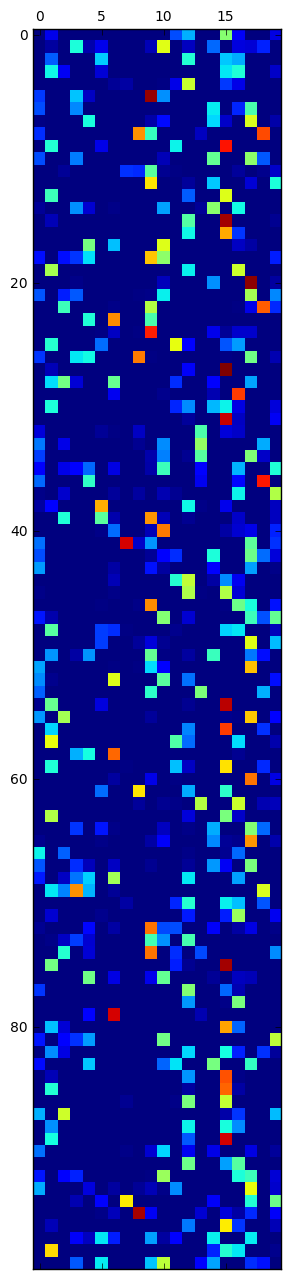

In [423]:
# plt.matshow(np.asmatrix(nmf_mod_test.fit_transform(tfidf[:100])));
plt.matshow(nmfxmat[:100])

In [290]:
# plt.matshow(nmfxmat[100:200]);

In [289]:
# plt.matshow(nmfxmat[200:300]);

In [426]:
nmf_topics = [np.argmax(nmfxmat.ix[n]) for n in nmfxmat.index.tolist()]
nmf_topic_weight = [np.max(nmfxmat.ix[n]) for n in nmfxmat.index.tolist()]

nmf_cluster = pd.DataFrame(nmf_topics, columns=['topics'])
# nmf_cluster

In [ ]:
plt.hist(nmf_topic_weight);

In [427]:
nmf_cluster.topics.value_counts()

0     661
15    657
14    649
5     637
12    578
6     570
16    546
3     532
17    496
11    472
2     464
9     463
19    457
1     454
4     440
13    437
7     425
8     414
10    382
18    317
Name: topics, dtype: int64

In [428]:
pd.concat([pd.DataFrame(recipeIDList, columns=['RecipeID']), nmf_cluster], axis=1)

RecipeID  topics
0             0      15
1             1      10
2             2      12
3             3      16
4             4      12
5             5       9
6             6      17
7             7      17
8             8      18
9             9      15
10           10      17
11           11       9
12           12       9
13           13      15
14           14      14
15           15      15
16           16      15
17           17      10
18           18       9
19           19      16
20           20      17
21           21      17
22           22      18
23           23       6
24           24       9
25           25      11
26           26       8
27           27      15
28           28       2
29           29      16
...         ...     ...
10021     10051       1
10022     10052      16
10023     10053      12
10024     10054      12
10025     10055       5
10026     10056      11
10027     10057       1
10028     10058      16
10029     10059       5
10030     10060       5
10031     10061      16
10032     10062      15
10033     10063       2
10034     10064      12
10035     10065      12
10036     10066       5
10037     10067       3
10038     10068       9
10039     10069      19
10040     10070      16
10041     10071      13
10042     10072       0
10043     10073       2
10044     10074       7
10045     10075      14
10046     10076       9
10047     10077      15
10048     10078       3
10049     10079       1
10050     10080      17

[10051 rows x 2 columns]

In [372]:
# [n for n in tokenize_and_stem(i) if n not in stopwords]
# totalvocab_stemmed0

In [345]:
# Ing0.ingred
# np.where(nmf_cluster==21)[0]

In [433]:
atopicList = Ing0.ingred[list(np.where(nmf_cluster==19)[0])].to_frame()

print(len(atopicList))

totalvocab_stemmed0 = []
totalvocab_tokenized0 = []
for i in atopicList.ingred:
    allwords_stemmed0 = [n for n in tokenize_and_stem(i) if n not in stopwords] #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed0.extend(allwords_stemmed0) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized0 = [m for m in tokenize_only(i) if m not in stopwords]
    totalvocab_tokenized0.extend(allwords_tokenized0)

# vocab_frame0 = pd.DataFrame({'words': totalvocab_tokenized0}, index = totalvocab_stemmed0)
# print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

vocab_frame0 = pd.DataFrame({'words': totalvocab_tokenized0})
vocab_frame0.words.value_counts().head(20)


457


butter     346
bay        241
leaf       235
onion      229
thyme      223
oil        222
garlic     141
olive      138
stock      107
parsley    106
milk        92
flour       84
white       83
leaves      81
wine        79
bacon       78
clove       74
celery      68
carrot      66
lemon       60
Name: words, dtype: int64

In [ ]:
# vocab_frame0.words.value_counts().head(15)

In [ ]:
# rTitle.title[list(np.where(nmf_cluster==22)[0])]
# rMethod.method[list(np.where(nmf_cluster==22)[0])]

In [295]:
# Ing0.ingred[list(np.where(nmf_cluster==55)[0])]#.index.tolist()
atopicList = Ing0.ingred[list(np.where(nmf_cluster==4)[0])].to_frame() ##.index.tolist()
atopicList

ingred
102    braising steak plain flour olive oil onion car...
177    plain white flour plain wholemeal flour oats b...
180    digestive biscuit butter mascarpone soft chees...
281    porcini mushrooms vegetable oil braising steak...
596                       butter sugar plain flour flour
695    good-quality dark-chocolate butter egg sugar p...
868    chopped into chunks butter milk white fish ski...
1008   cooking plum light brown sugar orange cinnamon...
1116                         plain flour egg milk butter
1124   plain flour unsalted butter caster sugar egg-e...
1388   5oz braising steak porcini mushrooms olive oil...
1436   sole or plaice plain flour oil butter unsalted...
1472                      plain flour egg milk olive oil
1522   plain flour mustard powder onion carrots plain...
1592   butter plain flour pork sausage leek butter pl...
1769   plain flour butter icing sugar cinnamon egg li...
2099   soft butter sugar lemon egg plain flour milk s...
2223   plain flour ground rice caster sugar butter mi...
2322   uncooked cocktail sausage sunflower oil plain ...
2369   /1lb 5oz-1lb 7oz skinless chicken breasts oil ...
2547   plain flour icing sugar butter lemon and 1 ora...
2563                 plain flour egg milk onion sausages
2631               plain flour butter egg milk asparagus
2659   grain rice butter mushroom oyster mushroom oni...
2767          egg-white sugar plain flour dark-chocolate
2779   milk egg-egg-yolks vanilla sugar cornflour pla...
2782   plain flour English mustard powder egg milk su...
2786          butter sugar of 1 lemon ginger plain flour
2821   butter plain flour milk fresh Gruyère pesto pa...
2878   plain flour egg milk courgette oil sweet chill...
...                                                  ...
6449   butter plain flour sugar egg vanilla extract r...
7011   peach slices in juice lemon Agave syrupAgave s...
7061   plain flour ground rice caster sugar butter mi...
7064                            plain flour butter water
7142   plain flour butter sugar egg-egg-yolk 5 pepper...
7280   cardamom pod plain flour flour butter orange i...
7281                            plain flour egg bran oil
7324   plain flour butter Parmesan cayenne pepper oli...
7391   mixed fruit apricot jam Brandy bran-dee plain ...
7586   pizza dough mix flour pesto or tapenade ball s...
7606   plain flour sugar bicarbonate of soda plain yo...
8022                   plain flour cayenne pepper frying
8216   cornichons salad plain flour butter eggs handf...
8221   cold slightly salted butter plain flour sugar ...
8309   spring-onion butter plain flour beer large egg...
8362   bacon joint cabbage olive oil onion plain flou...
8393   hazelnuts plain flour buckwheat flour caster s...
8403                   marshmallow plain popcorn pretzel
8408   plain flour butter oats hard cheese skinless a...
8730   sweet shortcrust pastry plain flour /11oz minc...
9108                   plain flour turkey stock marsala 
9235   large onions Onion un-yun distilled malt vineg...
9281   butter butter egg cocoa powder plain flour sug...
9464   eggs plain flour bicarbonate of soda sugar but...
9525   plain flour eggs breadcrumbs sunflower oil oli...
9683   hulled strawberries and of+0.5 lemon plain flo...
9685   buckwheat flour plain flour bicarbonate of sod...
9698   lamb mince tandoori paste cumin seeds 0.5*cucu...
9987   jalapeno chillies cream cheese mozzarella plai...
10022  butter caster sugar vanilla extract plain flou...

[95 rows x 1 columns]

In [99]:
def nmf_mod2(corpus, n_topics ):
# def nmf_mod(corpus):
    df = .60
    #n_topics = 50
    n_features = 0 #'not-set' ##2000
    n_top_words = 10
    
    # Use tf-idf features for NMF.
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(max_df=df, min_df=0.02,# max_features=n_features,
                                       tokenizer=tokenize_only, ngram_range=(1,2),
                                       stop_words=stopwords )#stop_words='english')

    tfidf = tfidf_vectorizer.fit_transform(corpus)


    # Fit the NMF model
    print("Fitting the NMF model with tf-idf features, "
          "n_topics= %d, n_topic_words= %d, n_features= %d..."
          % (n_topics, n_top_words, n_features))

    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
    
    print("\nTopics in NMF model:")
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    print_top_words(nmf, tfidf_feature_names, n_top_words)
    
    return  tfidf_feature_names, nmf, tfidf

In [264]:
tfidf_feature_names2, nmf_mod_test2, tfidf2 = nmf_mod(atopicList.ingred,30)

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features, n_topics= 30, n_topic_words= 10, n_features= 0...

Topics in NMF model:
Topic #0:

white wine wine white wine vegetable parmesan rice white butter onion butter oil butter stock parmesan

Topic #1:

paste curry curry paste coriander milk thai stock milk bread naan naan bread

Topic #2:

double cream double cream stock double butter cream vegetable onion oil onion celery butter onion

Topic #3:

cherry cherry tomato tomato couscous vegetable couscous leaves mint cheese mint leaves lemon

Topic #4:

clove garlic clove garlic onion garlic oil onion onion clove vegetable rosemary carrot coriander

Topic #5:

red pepper red pepper tomatoes vegetable yellow tomatoes red wine clove red onions mix

Topic #6:

potato potato vegetable thyme onion oil onion serve seed bread mint spring-onion

Topic #7:

parsley bacon flat-leaf parsley flat-leaf leek lemon watercress stock parsley onions rosemary

Topic #8:

flour pla

In [265]:
nmfxmat2 = pd.DataFrame(np.asmatrix(nmf_mod_test2.fit_transform(tfidf)))

In [199]:
# nmfxmat2.sort_values(by =[[0]] , axis=1)
# nmfxmat2.

In [210]:
# x = nmfxmat2.values
# # np.ndarray.sort(x,axis=1) # x is returned sorted 
# np.dot(x,x.T).shape
# plt.matshow(np.dot(x,x.T))

In [1102]:
# plt.matshow(nmfxmat2)

In [267]:
nmfxmat2.index = atopicList.index
# nmfxmat2

In [268]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=123).fit(nmfxmat2)
# centers2D = pca.transform(kmeans.cluster_centers_)

# plt.hold(True)

# plt.scatter(data2D[:,0], data2D[:,1],c='w', edgecolors='grey');

# plt.scatter(centers2D[:,0], centers2D[:,1], 
#             marker='x', s=200, linewidths=3, c='r');

# # plt.show()              #not required if using ipython notebook

In [ ]:
kmcluster = kmeans.labels_.tolist()
kmeans.cluster_centers_


In [ ]:
kmdist = pd.DataFrame(kmeans.transform(nmfxmat2))

kmdist['mindist'] = kmdist.min(axis=1)
kmdist.index = butternutList.index
# kmdist

In [ ]:
tfidf2

In [274]:
atopicList['kmcluster'] = kmcluster
atopicList['kmclust_mindist'] = kmdist.mindist
# butternutList.groupby

atopicList[atopicList.kmcluster==2].sort_values(by='kmclust_mindist')

ingred  kmcluster  \
503   vegetable or olive oil onion cumin seed mustar...          2   
200   sunflower oil curry paste onion lemongrass car...          2   
247   vegetable oil onion garlic Madras curry paste ...          2   
1110  curry paste onion carrot red lentils vegetable...          2   
444   olive oil butternut squash carrot curry powder...          2   
3332  sunflower oil pork fillet Madras curry paste b...          2   
2000  sunflower oil onion turmeric ginger coriander ...          2   
7     oil onion garlic clove potatoes carrot parsnip...          2   
1322  smoked haddock milk vegetable stock thyme vege...          2   
2189  egg noodles olive oil Thai red curry paste spr...          2   
847   onion olive oil Thai red curry paste red lenti...          2   
3456  olive oil onion garlic clove cumin ginger hari...          2   
396   sunflower oil crunchy stir-fry vegetables shii...          2   
948   vegetable oil onion garlic root ginger red chi...          2   
183   or squash peeled and roughly chopped sunflower...          2   
4563  butternut squash red onion garlic olive oil cu...          2   
67    curry powder olive oil onions apple garlic cor...          2   
65    oil onion potato aubergine button mushrooms cu...          2   
7526  butternut squash carrot Korma paste coriander ...          2   
1040  vegetable stock cube nests egg broccoli sesame...          2   
258   oil onion Thai red curry paste butternut squas...          2   
229   vegetable oil onion Thai curry paste vegetable...          2   
1479  red chillies garlic ginger lemongrass turmeric...          2   
3686  baking potato sunflower oil seed black mustard...          2   
6580  vegetable oil onion cumin seeds curry paste re...          2   
4993  Thai green curry paste groundnut oil vegetable...          2   
5484  olive oil onion celery potato carrot parsnip c...          2   
1468  white onion olive oil garlic carrots red lenti...          2   
1768  sunflower oil courgettes seeds ginger garlic c...          2   
3451  vegetable stock thin ginger red chilli spring-...          2   
6     cumin seeds chilli flakes olive oil red lentil...          2   
10    cumin seed chilli flakes olive oil onion red s...          2   

      kmclust_mindist  
503          0.182819  
200          0.183076  
247          0.224000  
1110         0.226317  
444          0.235225  
3332         0.246645  
2000         0.247242  
7            0.248772  
1322         0.251925  
2189         0.255348  
847          0.262164  
3456         0.265617  
396          0.270998  
948          0.274722  
183          0.285750  
4563         0.291843  
67           0.297218  
65           0.301263  
7526         0.303674  
1040         0.315111  
258          0.319597  
229          0.336515  
1479         0.372936  
3686         0.373245  
6580         0.381894  
4993         0.408387  
5484         0.442160  
1468         0.448485  
1768         0.450408  
3451         0.505269  
6            0.526498  
10           0.567324

https://www.coursera.org/learn/machine-learning-data-analysis/lecture/Ebb2M/running-a-k-means-cluster-analysis-in-python-pt-1   
https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/   


In [ ]:
plt.plot(nmfxmat_tsne[:,1])

In [ ]:
# len(nmfxmat_tsne)
labels = [str(n) for n in range(len(nmfxmat_tsne))]

In [ ]:

# vocabulary = iList2

def simpleplot_withLabels(Y, labels):
    plt.scatter(Y[:, 0], Y[:, 1])
    for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()


# vocabulary = ListC #iList2

plt.figure(figsize=[24,15])
simpleplot_withLabels(nmfxmat_tsne, labels)


In [ ]:
Ing0.ingred[6320]

In [ ]:
## SVD?? 
def LSA_mod(corp): #(corp, df):
    df = .98
    n_samples = 2000
    n_features = 0 #1000
    n_topics = 60
    n_top_words = 10


    # Use tf-idf features.
    print("Extracting tf-idf features for LSA...")
    tfidf_vectorizer = TfidfVectorizer(max_df=df, min_df=.0015, #max_features=n_features,
                                       tokenizer=tokenize_only, ngram_range=(1,3),
                                       stop_words=stopwords )#stop_words='english')

    tfidf = tfidf_vectorizer.fit_transform(corp)


    # Fit the model
    print("Fitting the LSA model with tf-idf features,"
          "n_samples=%d and n_features=%d..."
          % (n_samples, n_features))

    lsa = TruncatedSVD(n_topics, algorithm = 'arpack').fit(tfidf)
    
    print("\nTopics in LSA model:")
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    
    print("\nExplained variance ratio", lsa.explained_variance_ratio_)
    print_top_words(lsa, tfidf_feature_names, n_top_words) 
    
    return tfidf_feature_names,lsa,tfidf

In [ ]:
tfidf_feature_names, lsa, tfidf = LSA_mod(Ing0.ingred)

In [ ]:
# pd.DataFrame(lsa.components_.round(5),columns=tfidf_feature_names).T

In [ ]:
# sum([n*n for n in lsa.explained_variance_])

In [ ]:
lsaxmat = pd.DataFrame(np.asmatrix(lsa.fit_transform(tfidf)))
lsaxmat.shape

In [ ]:
plt.matshow(lsaxmat[:100]);

In [ ]:
lsa_topics  = [np.argmax(lsaxmat.ix[n]) for n in lsaxmat.index.tolist()]
lsa_cluster = pd.DataFrame(lsa.fit_transform(tfidf))
lsa_cluster = pd.DataFrame(lsa_topics, columns=['topics'])

In [ ]:
lsa_topics

In [126]:
# Ing

In [95]:
# https://github.com/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb
from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.decomposition import LatentDirichletAllocation

In [236]:
# tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
#                                 stop_words = stopwords, #
#                                 lowercase = True,
#                                 token_pattern = r'\b[a-zA-Z]{3,}\b',
#                                 max_df = 0.5, 
#                                 min_df = 10,
#                                 ngram_range=(1, 3))


itf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stopwords, #
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,
                                ngram_range=(1, 3))

mtf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stopwords, #
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10,
                                ngram_range=(1, 3))

# dtm_tf = tf_vectorizer.fit_transform(dtm)
# print(dtm_tf.shape) 

Ingdtm_tf = itf_vectorizer.fit_transform(Ing.ingred)
Methoddtm_tf = mtf_vectorizer.fit_transform(Ing.method)

print(Ingdtm_tf.shape)
print(Methoddtm_tf.shape)


(10051, 4341)
(10051, 20093)


In [239]:
# tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
# dtm_tfidf = tfidf_vectorizer.fit_transform(dtm)
# print(dtm_tfidf.shape)

itfidf_vectorizer = TfidfVectorizer(**itf_vectorizer.get_params())
Ingdtm_tfidf = itfidf_vectorizer.fit_transform(Ing.ingred)

mtfidf_vectorizer = TfidfVectorizer(**mtf_vectorizer.get_params())
methoddtm_tfidf = mtfidf_vectorizer.fit_transform(Ing.method)


print(Ingdtm_tfidf.shape)
print(methoddtm_tfidf.shape)

(10051, 4341)
(10051, 20093)


In [254]:
# # for TF DTM
# lda_tf = LatentDirichletAllocation(n_topics=100, random_state=0)
# lda_tf.fit(dtm_tf)

# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_topics=200, random_state=0)
# lda_tfidf.fit(dtm_tfidf)
# lda_tfidf.score(dtm_tfidf)


ilda_tfidf = LatentDirichletAllocation(n_topics=180, random_state=0)
ilda_tfidf.fit(Ingdtm_tfidf)
print(ilda_tfidf.score(Ingdtm_tfidf))


mlda_tfidf = LatentDirichletAllocation(n_topics=80, random_state=0)
mlda_tfidf.fit(methoddtm_tfidf)
print(mlda_tfidf.score(Methoddtm_tfidf))

-522235.192484


In [273]:
ilda_tfidf.exp_dirichlet_component_.shape
ilda_tfidf.

(180, 4341)

In [ ]:
# pyLDAvis.prepare()

In [115]:
# pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

In [ ]:
# pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)
pyldavisI.topic_info#.head()
itopIDX = pyldavisI.topic_info.groupby('Category')['Category'].count().head(30).index.tolist() #.sort_values(ascending =False)
itopIDX 
iidx = [int(i.replace('Topic','')) for i in itopIDX[1:] ]

In [441]:
pyldavisI = pyLDAvis.sklearn.prepare(ilda_tfidf, Ingdtm_tfidf, itfidf_vectorizer, mds='mmds')
pyLDAvis.sklearn.prepare(ilda_tfidf, Ingdtm_tfidf, itfidf_vectorizer, mds='mmds') #180 #240 #300 #250 #150 #200*

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
58     22.967327        1       1  0.062346  0.373449
35     14.025609        1       2  0.381750  0.227601
92     10.668276        1       3 -0.154194  0.430071
10      5.082588        1       4 -0.033994  0.515401
47      4.796475        1       5  0.520059 -0.069231
153     4.263077        1       6  0.511320  0.101535
127     1.923788        1       7  0.103061  0.525628
16      1.791334        1       8 -0.440533 -0.330359
113     1.552882        1       9 -0.458165  0.298171
95      1.248846        1      10  0.277959  0.469495
18      1.169353        1      11  0.443385  0.303375
30      1.156672        1      12 -0.073800  0.547052
85      1.038454        1      13 -0.495910  0.171882
31      0.942322        1      14 -0.328521  0.427702
120     0.874567        1      15  0.066419 -0.540005
80      0.873030        1      16 -0.369105  0.380499
62      0.798300        1      17 -0.236864  0.459905
156     0.662724        1      18 -0.497902  0.087528
32      0.642250        1      19  0.298667  0.406974
8       0.601846        1      20  0.466491  0.189080
121     0.592965        1      21 -0.491665 -0.056322
69      0.538920        1      22  0.197435 -0.469823
56      0.469750        1      23  0.325130  0.347342
15      0.465090        1      24 -0.284800 -0.394378
22      0.453854        1      25 -0.440252 -0.191438
168     0.452424        1      26  0.442675 -0.154363
106     0.433976        1      27  0.415749 -0.246234
174     0.430120        1      28 -0.372850 -0.292306
138     0.417568        1      29  0.294342 -0.375568
135     0.412907        1      30 -0.098798 -0.467179
49      0.407270        1      31 -0.321464 -0.322641
118     0.378432        1      32  0.138104 -0.427725
90      0.343893        1      33 -0.420672 -0.094277
123     0.310148        1      34  0.299626 -0.294204
55      0.304193        1      35  0.330495 -0.241275
93      0.298779        1      36  0.408573 -0.030445
122     0.292829        1      37  0.391213  0.076556
128     0.282211        1      38  0.188552 -0.353246
157     0.267369        1      39 -0.196639 -0.329260
25      0.267096        1      40 -0.151955 -0.365323
26      0.243102        1      41 -0.341882 -0.071752
169     0.242382        1      42 -0.332795  0.110158
161     0.223446        1      43  0.058716 -0.342849
116     0.216939        1      44 -0.030639 -0.347393
159     0.205801        1      45  0.062513  0.316365
111     0.189656        1      46 -0.214850  0.206181
178     0.186216        1      47 -0.257942  0.127145
78      0.185892        1      48 -0.200227 -0.218128
33      0.164596        1      49 -0.002152 -0.244365
1       0.162530        1      50  0.140212 -0.199154
160     0.154215        1      51  0.187685 -0.136674
117     0.137570        1      52  0.085942  0.178384
81      0.131649        1      53 -0.162353  0.026462
108     0.126562        1      54  0.098053  0.112417
27      0.124481        1      55 -0.074770  0.114428
38      0.124418        1      56 -0.020348  0.140869
68      0.121406        1      57  0.088640 -0.081555
51      0.120280        1      58  0.114817 -0.029390
142     0.119529        1      59  0.110897  0.027905
65      0.117899        1      60  0.099956  0.069684
2       0.116120        1      61  0.103518  0.005607
137     0.114831        1      62  0.082463  0.043757
170     0.113000        1      63 -0.077229  0.071693
154     0.111573        1      64 -0.072755 -0.026243
74      0.110842        1      65  0.030814 -0.077153
72      0.110300        1      66  0.069569 -0.035923
88      0.108982        1      67 -0.059060 -0.038556
40      0.105739        1      68  0.013991  0.047294
6       0.105090        1      69  0.001015  0.040734
3       0.102631        1      70  0.033005 -0.007287
48      0.102578        1      71  0.032998 -0.018106
4       0.101301        1  

In [292]:
pyldavisM = pyLDAvis.sklearn.prepare(mlda_tfidf, methoddtm_tfidf, mtfidf_vectorizer, mds='mmds')
pyLDAvis.sklearn.prepare(mlda_tfidf, methoddtm_tfidf, mtfidf_vectorizer, mds='mmds') #80 #150 #50 #10 #100 -- 3 large clusters

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
23     60.261119        1       1 -0.018715 -0.243486
51     29.999330        1       2 -0.300378 -0.121990
61      0.465735        1       3 -0.208228  0.140189
4       0.150414        1       4  0.031977  0.028847
65      0.141542        1       5 -0.021299 -0.010590
44      0.128702        1       6  0.003071  0.018603
69      0.126383        1       7 -0.002523  0.010851
14      0.125929        1       8  0.016871  0.008100
45      0.124931        1       9 -0.003007 -0.001878
16      0.124441        1      10  0.015325 -0.002396
35      0.123626        1      11  0.005387 -0.005520
62      0.122726        1      12  0.007279 -0.004144
24      0.122713        1      13  0.012854  0.001403
18      0.122655        1      14  0.011734 -0.002333
21      0.122373        1      15  0.008063  0.008860
9       0.122286        1      16  0.009363 -0.003031
60      0.121861        1      17  0.005145  0.007893
58      0.121741        1      18  0.009825  0.006785
8       0.121345        1      19  0.003855 -0.000430
48      0.121330        1      20  0.003538  0.005610
29      0.120937        1      21  0.002934  0.003364
13      0.120826        1      22  0.009899  0.004139
32      0.120691        1      23  0.011090  0.003117
40      0.120686        1      24  0.009700  0.001189
63      0.120388        1      25  0.008787  0.004181
39      0.120193        1      26  0.007676  0.000053
59      0.120193        1      27  0.007611  0.005054
41      0.119900        1      28  0.005067  0.001293
77      0.119830        1      29  0.006126  0.004429
22      0.119748        1      30  0.005340  0.003925
78      0.119678        1      31  0.008107  0.001503
25      0.119649        1      32  0.008383  0.002761
36      0.119626        1      33  0.006943  0.004171
72      0.119603        1      34  0.006170  0.001196
37      0.119528        1      35  0.006903  0.001143
1       0.119491        1      36  0.005146  0.002107
66      0.119427        1      37  0.005153  0.003082
73      0.119299        1      38  0.005551  0.002520
27      0.118312        1      39  0.006745  0.002606
2       0.118312        1      40  0.006745  0.002606
3       0.118312        1      41  0.006745  0.002606
5       0.118312        1      42  0.006745  0.002606
12      0.118312        1      43  0.006745  0.002606
20      0.118312        1      44  0.006745  0.002606
19      0.118312        1      45  0.006745  0.002606
6       0.118312        1      46  0.006745  0.002606
7       0.118312        1      47  0.006745  0.002606
17      0.118312        1      48  0.006745  0.002606
10      0.118312        1      49  0.006745  0.002606
15      0.118312        1      50  0.006745  0.002606
11      0.118312        1      51  0.006745  0.002606
26      0.118312        1      52  0.006745  0.002606
79      0.118312        1      53  0.006745  0.002606
28      0.118312        1      54  0.006745  0.002606
54      0.118312        1      55  0.006745  0.002606
76      0.118312        1      56  0.006745  0.002606
75      0.118312        1      57  0.006745  0.002606
74      0.118312        1      58  0.006745  0.002606
71      0.118312        1      59  0.006745  0.002606
70      0.118312        1      60  0.006745  0.002606
68      0.118312        1      61  0.006745  0.002606
67      0.118312        1      62  0.006745  0.002606
64      0.118312        1      63  0.006745  0.002606
57      0.118312        1      64  0.006745  0.002606
56      0.118312        1      65  0.006745  0.002606
55      0.118312        1      66  0.006745  0.002606
53      0.118312        1      67  0.006745  0.002606
30      0.118312        1      68  0.006745  0.002606
52      0.118312        1      69  0.006745  0.002606
50      0.118312        1      70  0.006745  0.002606
49      0.118312        1      71  0.006745  0.002606
47      0.118312        1  

In [210]:
# pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne') # doesn't work if array has infs or nans

In [383]:
# pyLDAvis.show(pyldavisM)
# pyLDAvis.display(pyldavisM)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [03/Dec/2016 23:22:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Dec/2016 23:22:50] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [03/Dec/2016 23:22:51] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Dec/2016 23:22:52] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


In [1018]:

lda_tfidfT = pd.DataFrame(ilda_tfidf.transform(Ingdtm_tfidf))
# lda_tfidfT

In [294]:
np.exp(-554.979039475)

False

In [ ]:
import pickle

# fruits = dict(banana=0, pear=2, apple=6)
# snakes = ['cobra', 'viper', 'rattler']

# with open('stuff.pkl', 'wb') as f:
#     pickle.dump(fruits, f)
#     pickle.dump(snakes, f)

# with open('stuff.pkl', 'rb') as f:
#     food = pickle.load(f)
#     pets = pickle.load(f)

# food
# {'pear': 2, 'apple': 6, 'banana': 0}
# pets
# ['cobra', 'viper', 'rattler']

# pyLDAvis.PreparedData(topic_coordinates, topic_info, token_table, R, lambda_step, plot_opts, topic_order)
# ilda_tfidf, Ingdtm_tfidf, itfidf_vectorizer, pyldavisI
with open('bbcgf_ingred_LDA_180comps.pkl', 'wb') as f:
    pickle.dump(ilda_tfidf, f) #model
    pickle.dump(Ingdtm_tfidf, f) #doc-token-vec
    pickle.dump(itfidf_vectorizer, f) #vectorizer
    pickle.dump(pyldavisI, f) #

# mlda_tfidf, methoddtm_tfidf, mtfidf_vectorizer, pyldavisM
with open('bbcgf_method_LDA_80comps.pkl', 'wb') as f:
    pickle.dump(mlda_tfidf, f)
    pickle.dump(methoddtm_tfidf, f)
    pickle.dump(mtfidf_vectorizer, f)
    pickle.dump(pyldavisM, f)


In [980]:
DF.prepDifficulty.value_counts()

Easy           8464
More effort    1364
A challenge     223
Name: prepDifficulty, dtype: int64

In [1050]:
pd.DataFrame([', '.join(n) for n in DF.recipeInfo if len(n)!=0])[0].value_counts()

freezable                                                                             1845
vegetarian                                                                            1148
healthy                                                                                450
freezable, vegetarian                                                                  401
gluten-free                                                                            307
gluten-free, vegetarian                                                                226
vegetarian, healthy                                                                    204
doubled-halved                                                                         161
freezable, healthy                                                                     147
healthy, vegetarian                                                                    103
easily-halved                                                                           97

In [1041]:
pd.DataFrame([n for n in DF.recipeInfo if len(n)!=0])[2].value_counts()

vegetarian     244
healthy        123
vegan          107
gluten-free     76
dairy-free      26
egg-free        14
nut-free        13
Name: 2, dtype: int64

In [1040]:
pd.DataFrame([n for n in DF.recipeInfo if len(n)!=0])[1].value_counts()

vegetarian        1086
healthy            480
gluten-free        300
vegan              139
doubled-halved      98
easily-doubled      44
easily-halved       43
dairy-free          39
nut-free            13
egg-free            12
freezable            9
Name: 1, dtype: int64

In [1039]:
pd.DataFrame([n for n in DF.recipeInfo if len(n)!=0])[0].value_counts()

freezable         2927
vegetarian        1525
healthy            707
gluten-free        590
doubled-halved     269
easily-halved      170
easily-doubled     121
dairy-free          42
egg-free             6
nut-free             4
vegan                2
Name: 0, dtype: int64

In [313]:
# http://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html

# http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html**

# http://stackoverflow.com/questions/26825729/extract-number-from-string-python

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 

In [1005]:
# IDXeasy.index.tolist()
# IDXmoreEffort.index.tolist()
# IDXchallenge.index.tolist()

df_easy = DF.ix[IDXeasy.index.tolist()][:1200]#[:200]
df_effort = DF.ix[IDXmoreEffort.index.tolist()][:1200]#[:200]
df_challenge = DF.ix[IDXchallenge.index.tolist()][:200]

# df = pd.concat([df_easy,df_effort,df_challenge],axis=0)
df = pd.concat([df_easy,df_effort],axis=0)

traintestIDLabel = df.prepDifficulty.to_frame()#.reset_index()
# traintestIDLabel.index.tolist()

In [801]:
# df

In [647]:
#  int(filter(str.isdigit, 'Including 40-45 minutes in the oven.'))
# list(filter(str.isdigit, 'Including 45 minutes in the oven.'))

(re.findall('\s+hour', 'Including 40-45 hour in the oven.' ))

[' hour']

In [728]:
# (re.findall('\d+', 'Ready in 1½ - 1¾ hrs' ))
n ='Takes 1 hr 30 plus 2 hours cooling + chilling'#.index('hour')
(re.findall('\s+hour', n) or re.findall('\s+hr', n))#.strip()
re.findall('\s+hour|hr', n)#.strip()
re.findall('\d+', n)
n.index('hour')

21

In [772]:
cntN=[]

for n in df.prepInfo:
    print(n)
    if n !=None:
        digits = (re.findall('\d+', n))
        mins = (re.findall('\s+min', n))#.strip()
        hours = re.findall('\s+hour|hr|hrs', n)#.strip()

        if digits!=[]:

            if len(digits)==1:
                N = digits
            elif len(digits)>1:
                if digits[0] == 'hr' or  digits[0]=='hour':
                    N=digits[0]
                
                elif n.find('min')!=-1  and n.find('hour')!=-1 :

                    if n.index('min') < n.index('hour') and len(digits)==2:
                        N = digits[0] + digits[1]*60

                    elif n.index('min') > n.index('hour') and len(digits)==2:
                        N = digits[0]*60 + digits[1]

                    elif len(digits)==3  and n.index('hour')> n.index('min'): #and len(n.index('hour'))==2
                        N = digits[1] + digits[2]*60  #digits[0]*60 + digits[1] + digits[2]*60      
                        
                    elif len(digits)==3  and n.index('hour')< n.index('min'): #and len(n.index('hour'))==2
                        N = digits[1]*60 + digits[1] #+ digits[2]*60      

                if n.find('min')!=-1  and n.find('hr')!=-1 :
                    
                    if n.index('min') < n.index('hr') and len(digits)==2:
                        N = digits[0] + digits[1]*60
                        
                    elif n.index('min') > n.index('hr') and len(digits)==2:
                        N = digits[0]*60 + digits[1]
                    
                    elif len(digits)==3 and n.index('hr')> n.index('min'): #and len(n.index('hr'))==2 
                        N =  digits[1] + digits[2]*60  #digits[0]*60 + digits[1] + digits[2]*60  
                    
                    elif len(digits)==3 and n.index('hr')< n.index('min'): #and len(n.index('hr'))==2
                        N = digits[1]*60 + digits[1] #+ digits[2]*60   
                    
                        cntN.append(N)   
            print(hours, N)
    

None
None
Plus baking and cooling time
Including 40-45 minutes in the oven.
[] ['3']
None
None
None
Ready in 25 mins
[] ['25']
None
None
None
None
None
None
Ready in 30 minutes, plus cooling
[] ['30']
None
None
None
None
None
Ready in 45 mins
[] ['45']
None
None
Ready in 25-35 minutes
[] ['45']
Takes 1 hr 30 plus 2 hours cooling + chilling
['hr', ' hour'] ['45']
None
None
None
None
None
None
None
None
None
None
None
Plus 1 hr and overnight chilling
['hr'] ['1']
None
None
Ready in 20-25 mins
[] ['1']
None
None
None
None
None
None
None
None
None
None
None
None
None
Or 40-50 mins if baking the pastry a day ahead
[] ['1']
None
Plus cooling
Ready in 40-50 minutes
[] ['1']
None
None
None
None
Plus 2 hours proving
[' hour'] ['2']
None
None
None
None
None
None
None
None
None
None
Takes 35 mins
[] ['35']
None
None
None
None
None
None
None
None
None
Plus rhubarb cooking and cooling
None
None
None
None
None
Ready in 35-40 minutes
[] ['35']
None
None
None
None
None
Including cooking potato
None
No

In [819]:
###
sum(Ing.cookTime.isnull())

0

In [1006]:
traintestIng = Ing.ix[traintestIDLabel.index.tolist()]
traintestIng

title  \
0                                                               Lemon drizzle cake   
1                                                                 Chilli con carne   
2                                                          Ultimate chocolate cake   
4                                                        Yummy scrummy carrot cake   
5                                                      Chicken & chorizo jambalaya   
6                                                      Spiced carrot & lentil soup   
7                                                    Spicy root & lentil casserole   
8                                                         Summer-in-winter chicken   
9                                          Classic scones with jam & clotted cream   
10                                              Red lentil, chickpea & chilli soup   
11                                                         Mustard-stuffed chicken   
12                                                                 Chicken biryani   
13                                                         Raspberry Bakewell cake   
14                                                                 Falafel burgers   
15                                                       Classic Victoria sandwich   
16                                                          Chocolate brownie cake   
17                                                        Creamy courgette lasagne   
18                                                        One-pot chicken chasseur   
19                                                    Unbelievably easy mince pies   
20                                                         Carrot & coriander soup   
21                                    Veggie shepherd's pie with sweet potato mash   
22                                                              Oven-baked risotto   
23                                                             Chicken noodle soup   
24                                           Chicken, sweet potato & coconut curry   
25                                                             New York Cheesecake   
26                               Butternut squash soup with chilli & crème fraîche   
27                                                           Chocolate marble cake   
28                                                     Superhealthy salmon burgers   
29                                                         Best Yorkshire puddings   
31                                                     American blueberry pancakes   
32                                                          Crispy Greek-style pie   
33                                             One-pan salmon with roast asparagus   
34                                                               Hearty pasta soup   
35                                                                     Cottage pie   
36                                                Pizza margherita in 4 easy steps   
37                                                        Fish pie - in four steps   
38                                           Strawberry cheesecake in 4 easy steps   
40                                                          No-fuss shepherd's pie   
41                                         Honey mustard chicken pot with parsnips   
42                                                          Moroccan chickpea soup   
43                                                             Easiest ever paella   
44                                        Sticky stem ginger cake with lemon icing   
45                                                  Carrot & cream cheese cupcakes   
46                                                     Chicken & mushroom puff pie   
47                                                                     Tomato soup   
49                                                       Leek, bacon & potato soup   
50                                 

In [633]:
from sklearn.cross_validation import train_test_split

In [1080]:
xtrain_0, xtest_hold, ytrain_0, ytest_hold = train_test_split(traintestIng, traintestIDLabel, train_size = 0.8, random_state=1234)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain_0, ytrain_0, train_size = 0.7, random_state=1234)

In [942]:
# xtrain
# ytrain
# len(ytest)

In [602]:
#     pickle.dump(ilda_tfidf, f) #model
#     pickle.dump(Ingdtm_tfidf, f) #doc-token-vec
#     pickle.dump(itfidf_vectorizer, f) #vectorizer

In [358]:
# iX_train_vec

In [653]:
from scipy.sparse import coo_matrix, hstack
# hstack([iX_train_vec,mX_train_vec])#.toarray()

In [859]:
# xtrain.reset_index()[['Ningred','prepTime','cookTime']]

In [1009]:
# itopIDX = pyldavisI.topic_info.groupby('Category')['Category'].count().head(30).index.tolist() #.sort_values(ascending =False)
# itopIDX 
# iidx = list(np.array([int(i.replace('Topic','')) for i in itopIDX[1:] ])-1)
# iidx

In [1008]:
# len(xtest.reset_index()[['Ningred','prepTime','cookTime']])
# iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test00],axis=1)
# iX_test

In [1074]:
# pd.DataFrame(iX_train_vec.todense())
# iX_train_vec.shape

In [1093]:
## Convert Raw string items to vec
## Apply LDA modelling... pick some components rather than all... 

iX_train_vec = itfidf_vectorizer.transform(xtrain.ingred)
# iX_train_vec = pd.DataFrame(iX_train_vec.todense())
# iX_train_vec.columns = ['i_'+str(i) for i in range(iX_train_vec.shape[1])]
print(iX_train_vec.shape)
iX_train0 = pd.DataFrame(ilda_tfidf.transform(iX_train_vec))
iX_train0.columns = ['i_'+str(i) for i in range(iX_train0.shape[1])]
iX_train00 = iX_train0#[iidx]
iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train00],axis=1)
# iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train_vec],axis=1)
print(iX_train.shape)


mX_train_vec = mtfidf_vectorizer.transform(xtrain.method)
# mX_train_vec = pd.DataFrame(mX_train_vec.todense())
# mX_train_vec.columns = ['m_'+str(m) for m in range(mX_train_vec.shape[1])]
print(mX_train_vec.shape)
mX_train0 = pd.DataFrame(mlda_tfidf.transform(mX_train_vec))
mX_train0.columns = ['m_'+str(m) for m in range(mX_train0.shape[1])]
mX_train = mX_train0#[[0,1,2,79]]
mX_train00 = mX_train0#[[0,1,2,79]]
mX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],mX_train00],axis=1)
# mX_train = mX_train_vec
print(mX_train.shape)

# X_train_vec = hstack([iX_train_vec,mX_train_vec]).todense()#.toarray()
# print(X_train_vec.shape)
X_train = pd.concat([iX_train,mX_train],axis=1)
print(X_train.shape)

print()

iX_test_vec = itfidf_vectorizer.transform(xtest.ingred)
# iX_test_vec = pd.DataFrame(iX_test_vec.todense())
# iX_test_vec.columns = ['i_'+str(i) for i in range(iX_test_vec.shape[1])]
print(iX_test_vec.shape)
iX_test0 = pd.DataFrame(ilda_tfidf.transform(iX_test_vec))
iX_test0.columns = ['i_'+str(i) for i in range(iX_test0.shape[1])]
iX_test00 = iX_test0#[iidx]
iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test00],axis=1)
# iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test_vec],axis=1)
print(iX_test.shape)

mX_test_vec = mtfidf_vectorizer.transform(xtest.method)
# mX_test_vec = pd.DataFrame(mX_test_vec.todense())
# mX_test_vec.columns = ['m_'+str(m) for m in range(mX_test_vec.shape[1])]
print(mX_test_vec.shape)
mX_test0 = pd.DataFrame(mlda_tfidf.transform(mX_test_vec))
mX_test0.columns = ['m_'+str(m) for m in range(mX_test0.shape[1])]
mX_test = mX_test0#[[0,1,2,79]]
mX_test00 = mX_test0#[[0,1,2,79]]
mX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],mX_test00],axis=1)
# mX_test = mX_test_vec
print(mX_test.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_test = pd.concat([iX_test,mX_test],axis=1)
print(X_test.shape)


print()

iX_testhold_vec = itfidf_vectorizer.transform(xtest_hold.ingred)
# iX_testhold_vec = pd.DataFrame(iX_testhold_vec.todense())
# iX_testhold_vec.columns = ['i_'+str(i) for i in range(iX_testhold_vec.shape[1])]
print(iX_testhold_vec.shape)
iX_testhold0 = pd.DataFrame(ilda_tfidf.transform(iX_testhold_vec))
iX_testhold0.columns = ['i_'+str(i) for i in range(iX_testhold0.shape[1])]
iX_testhold00 = iX_testhold0#[iidx]
iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold00],axis=1)
# iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold_vec],axis=1)
print(iX_testhold.shape)

mX_testhold_vec = mtfidf_vectorizer.transform(xtest_hold.method)
# mX_testhold_vec = pd.DataFrame(mX_testhold_vec.todense())
# mX_testhold_vec.columns = ['m_'+str(m) for m in range(mX_testhold_vec.shape[1])]
print(mX_testhold_vec.shape)
mX_testhold0 = pd.DataFrame(mlda_tfidf.transform(mX_testhold_vec))
mX_testhold0.columns = ['m_'+str(m) for m in range(mX_testhold0.shape[1])]
mX_testhold = mX_testhold0#[[0,1,2,79]]
mX_testhold00 = mX_testhold0#[[0,1,2,79]]
mX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],mX_testhold00],axis=1)
# mX_testhold = mX_testhold_vec
print(mX_testhold.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_testhold = pd.concat([iX_testhold,mX_testhold],axis=1)
print(X_testhold.shape)



(1344, 4341)
(1344, 183)
(1344, 20093)
(1344, 83)
(1344, 266)

(576, 4341)
(576, 183)
(576, 20093)
(576, 83)
(576, 266)

(480, 4341)
(480, 183)
(480, 20093)
(480, 83)
(480, 266)


In [1094]:
from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_vec, ytrain.prepDifficulty)
clf = MultinomialNB().fit(X_train, ytrain.prepDifficulty)

In [1095]:
# predicted = clf.predict(X_test_vec)
predicted = clf.predict(X_test)
# predicted

In [1096]:
# clf.score(X_test_vec, ytest.prepDifficulty)
clf.score(X_test, ytest.prepDifficulty)

0.63541666666666663

In [1097]:
# clf.score(X_test_vec, ytest.prepDifficulty)
predicted = clf.predict(X_testhold)
clf.score(X_testhold, ytest_hold.prepDifficulty)

0.6645833333333333

In [1098]:
ytest.prepDifficulty.unique().tolist()

['Easy', 'More effort']

In [973]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline

# # text_clf = Pipeline([('vect', CountVectorizer()),
# #                      ('tfidf', TfidfTransformer()),
# #                      ('clf', MultinomialNB()),
# # ])


# text_clf = Pipeline([#('vect', CountVectorizer()),
#                      #('tfidf', TfidfTransformer()),
#                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
#                                            alpha=1e-3, n_iter=5, random_state=42)),
#                     ])
# # output_ = text_clf.fit(X_train_vec, ytrain.prepDifficulty)
# # predicted = text_clf.predict(X_test_vec)
# # text_clf.score(X_test_vec, ytest.prepDifficulty)

# output_ = text_clf.fit(X_train, ytrain.prepDifficulty)
# predicted = text_clf.predict(X_test)
# print(text_clf.score(X_test, ytest.prepDifficulty))
# print(text_clf.score(X_testhold, ytest_hold.prepDifficulty))

In [1099]:
from sklearn import metrics

print(metrics.classification_report(ytest_hold.prepDifficulty, predicted,
#     target_names=ytest.prepDifficulty.unique().tolist() 
                                   ))


             precision    recall  f1-score   support

       Easy       0.67      0.72      0.70       255
More effort       0.66      0.60      0.63       225

avg / total       0.66      0.66      0.66       480



In [1100]:
metrics.confusion_matrix(ytest_hold.prepDifficulty, predicted)

array([[184,  71],
       [ 90, 135]])

In [1101]:
# from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# import numpy as np
# import pandas as pd
# from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn import tree,ensemble,cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score


# numFolds = 5
# kf = KFold(len(X), numFolds, shuffle=True)

# Models = [LogisticRegression, SGDClassifier]
# params = [{}, {"loss": "log", "penalty": "l2"}]

models = {}
models['Logistic_Regression'] =  LogisticRegression(penalty='l2', C=0.05, random_state=898) #C=1.0 #L1/2
models['SGD_Classifier'] =  SGDClassifier( random_state=898)
# models['K_nearest_neighbours'] =  KNeighborsClassifier() #(n_neighbors=20)
# models['naive_bayes'] = GaussianNB()
models['naive_bayes'] = MultinomialNB()
# models['svc'] = SVC(probability=True, C=3)
# models['descision_tree'] = tree.DecisionTreeClassifier()
# models['descision_tree_cart'] = tree.DecisionTreeClassifier()
# models['extratrees'] = tree.ExtraTreeClassifier()
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
                                                         max_depth=5,max_features=3,random_state=898)
# models['adaboostedTrees'] = ensemble.AdaBoostClassifier()
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.025, n_estimators=55, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=5, random_state=898)


for name, model in models.items():
    scores = cross_validation.cross_val_score(model, X_train, ytrain.prepDifficulty, n_jobs=1, cv = 5)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()
    
    mFit = model.fit(X_train, ytrain.prepDifficulty)
    y_pred = mFit.predict(X_test)
    
    print('Model: '+name)
    #print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
    print(classification_report(ytest.prepDifficulty, y_pred)) #, target_names=list(y_test.unique())))
    print ()
    
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    #sorted_features = sorted(zip(D2.feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
        #for feature in sorted_features:
            #print(feature)
        
    print("")



Model: RandomForest
Score: 0.753005829999

Model: RandomForest
             precision    recall  f1-score   support

       Easy       0.82      0.62      0.70       292
More effort       0.69      0.86      0.76       284

avg / total       0.76      0.74      0.73       576



Model: gradboostedTrees
Score: 0.762629828963

Model: gradboostedTrees
             precision    recall  f1-score   support

       Easy       0.82      0.66      0.73       292
More effort       0.71      0.85      0.77       284

avg / total       0.77      0.76      0.75       576



Model: naive_bayes
Score: 0.665173163509

Model: naive_bayes
             precision    recall  f1-score   support

       Easy       0.63      0.67      0.65       292
More effort       0.64      0.60      0.62       284

avg / total       0.64      0.64      0.63       576



Model: Logistic_Regression
Score: 0.733627771921

Model: Logistic_Regression
             precision    recall  f1-score   support

       Easy       0.75 